# Тема “Обучение без учителя”

### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

boston = load_boston()

In [2]:
data = boston["data"]
feature_names = boston["feature_names"]
target = boston["target"]
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
scaler = StandardScaler()

In [4]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)


In [5]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)


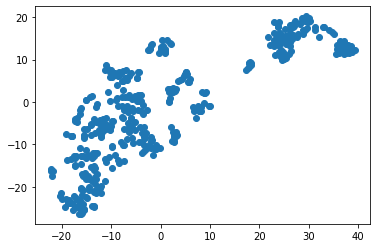

In [6]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

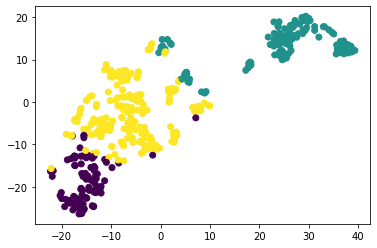

In [8]:
labels_train = kmeans.fit_predict(X_train_scaled)
X_train_tsne = tsne.fit_transform(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [9]:
print('price кластера 0: {}'.format(y_train.loc[labels_train == 0, 'price'].mean()))
print('price кластера 1: {}'.format(y_train.loc[labels_train == 1, 'price'].mean()))
print('price кластера 2: {}'.format(y_train.loc[labels_train == 2, 'price'].mean()))

price кластера 0: 27.788372093023252
price кластера 1: 16.165354330708666
price кластера 2: 24.958115183246072


In [10]:
print('CRIM кластера 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('CRIM кластера 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('CRIM кластера 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

CRIM кластера 0: 0.07356558139534886
CRIM кластера 1: 10.797028425196853
CRIM кластера 2: 0.42166020942408367


### *Задание 3 
Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора. Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [12]:
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_test_tsne = tsne.fit_transform(X_test_scaled)

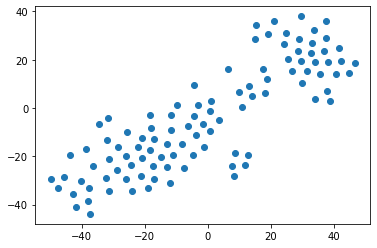

In [13]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1])

plt.show()

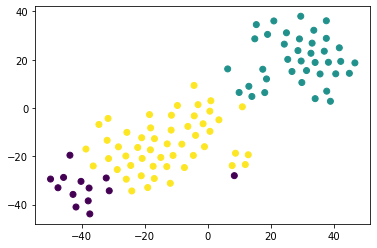

In [15]:
labels_test = kmeans.fit_predict(X_test_scaled)
X_test_tsne = tsne.fit_transform(X_test_scaled)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)

plt.show()

In [16]:
print('price кластера 0: {}'.format(y_test.loc[labels_test == 0, 'price'].mean()))
print('price кластера 1: {}'.format(y_test.loc[labels_test == 1, 'price'].mean()))
print('price кластера 2: {}'.format(y_test.loc[labels_test == 2, 'price'].mean()))

price кластера 0: 34.55384615384615
price кластера 1: 16.710526315789473
price кластера 2: 21.71764705882353


In [17]:
print('CRIM кластера 0: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('CRIM кластера 1: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('CRIM кластера 2: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

CRIM кластера 0: 0.08308461538461537
CRIM кластера 1: 9.419181842105264
CRIM кластера 2: 0.22250117647058823
